In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import balanced_accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing  import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_test = pd.read_csv('test.csv')

In [4]:
df_train

,sentence,language
0,"Pensez à la communication , le discours , les ...",fr
1,"Můžete si ji pronajmout , vzít na splátky , ko...",cs
2,"Každý starosta pochopil , že když mají tyto fo...",cs
3,"Det är ytterligare bevis , men ändå — Jag krit...",sv
4,كان الأمر لا يصدق .,ar
...,...,...
3159628,そんな所で捕まっている片手は 70億の人々と繫がる命綱なのです,ja
3159629,Първоначално се опитах да направя думите &quot...,bg
3159630,Ho appreso che ha a che fare con l&apos; atten...,it
3159631,E os edifícios não se limitam a apenas evocar ...,pt-br


In [5]:
lang_count = (
    df_train.language.value_counts()
    .to_frame()
    .reset_index()
)

lang_count.head()

,index,language
0,ru,181970
1,en,157655
2,fr,148585
3,vi,113193
4,ar,110032


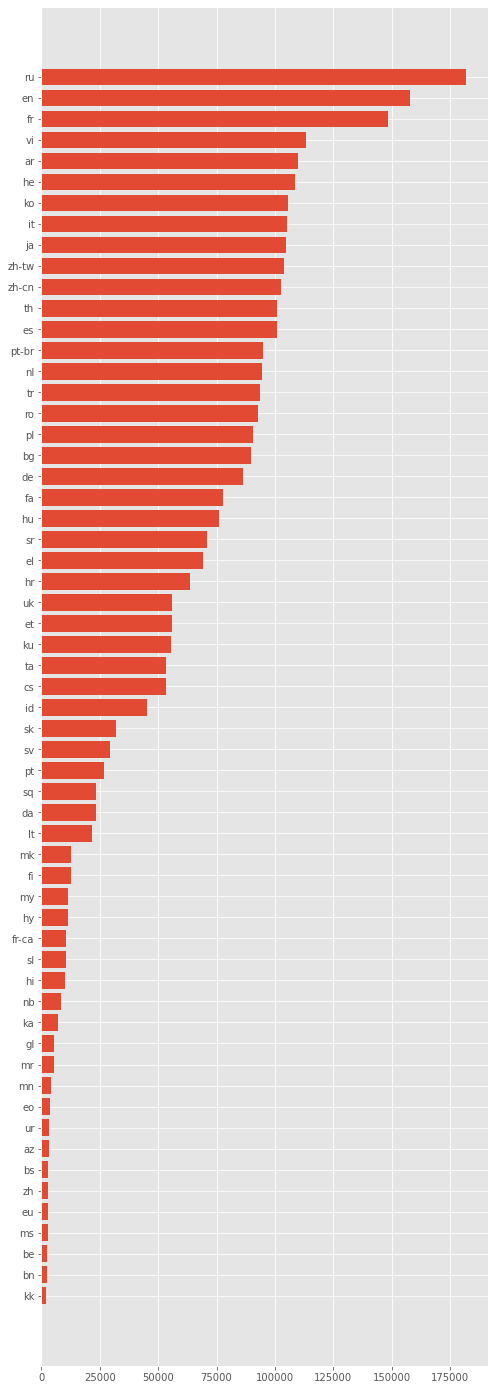

In [6]:
fig, ax = plt.subplots(figsize=(8,25))

ax.barh(lang_count['index'], lang_count['language'])
ax.invert_yaxis();

Удаляем выбросы c помощью кластеризации каждого языка

In [7]:
perem_rus = df_train[df_train['language'].apply(lambda x: x in {"ru"})]

In [8]:
vectorizer_rus = CountVectorizer(
#     min_df = 0.0001,
#     max_df=0.9,
)

In [9]:
X_train_rus = vectorizer_rus.fit_transform(perem_rus['sentence'])

In [10]:
kmeans = KMeans(n_clusters= 4, random_state= 123)

In [11]:
kmeans.fit(X_train_rus)

KMeans(n_clusters=4, random_state=123)

In [12]:
kmeans.labels_

array([2, 2, 0, ..., 2, 3, 2])

In [13]:
perem_rus['label'] = kmeans.labels_

<ipython-input-13-dea7184202db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perem_rus['label'] = kmeans.labels_


In [14]:
perem_rus[perem_rus['label'] == 0]

,sentence,language,label
26,гэта што калі мы не яны як але ён каб дзякуй б...,ru,0
140,гэта што калі мы не яны як але ён каб дзякуй б...,ru,0
155,гэта што калі мы не яны як але ён каб дзякуй б...,ru,0
264,гэта што калі мы не яны як але ён каб дзякуй б...,ru,0
307,гэта што калі мы не яны як але ён каб дзякуй б...,ru,0
...,...,...,...
3159382,гэта што калі мы не яны як але ён каб дзякуй б...,ru,0
3159402,гэта што калі мы не яны як але ён каб дзякуй б...,ru,0
3159445,гэта што калі мы не яны як але ён каб дзякуй б...,ru,0
3159574,гэта што калі мы не яны як але ён каб дзякуй б...,ru,0


In [15]:
df_train[df_train.sentence =='що це тому ми чи дуже які щоб дякую якщо було вона від мене ось']

,sentence,language
91,що це тому ми чи дуже які щоб дякую якщо було ...,ru
243,що це тому ми чи дуже які щоб дякую якщо було ...,th
305,що це тому ми чи дуже які щоб дякую якщо було ...,ru
314,що це тому ми чи дуже які щоб дякую якщо було ...,th
345,що це тому ми чи дуже які щоб дякую якщо було ...,en
...,...,...
3159489,що це тому ми чи дуже які щоб дякую якщо було ...,en
3159493,що це тому ми чи дуже які щоб дякую якщо було ...,en
3159509,що це тому ми чи дуже які щоб дякую якщо було ...,th
3159582,що це тому ми чи дуже які щоб дякую якщо було ...,ru


Выбросы с русского языка

In [16]:
# df_train.drop(df_train[df_train.sentence =='гэта што калі мы не яны як але ён каб дзякуй больш пра на вы'].index,inplace=True)
# df_train.drop(df_train[df_train.sentence =='що це тому ми чи дуже які щоб дякую якщо було вона від мене ось'].index,inplace=True)

В идеале так пройтись по каждому языку и посмотреть его выбросы, но так выбросы сделаны искусственно, можно обойтись другим способом:

In [17]:
df_train.sentence.value_counts().head(20)

що це тому ми чи дуже які щоб дякую якщо було вона від мене ось       75000
гэта што калі мы не яны як але ён каб дзякуй больш пра на вы          50000
бұл мен біз бір үшін ол деп және емес бар керек бірақ олар қол осы    50000
що це ми не як на вони та але ви до про він оплески коли              50000
the and of it that you to apos we this is in they so are              50000
это что мы не как на вы они но из то он так для аплодисменты          50000
笑声 掌声 谢谢 现在 所以 事实上 当然 鼓掌 但是 因此 那么 非常感谢 谢谢大家 是的 好吧                     25000
笑聲 掌聲 謝謝 所以 現在 事實上 當然 因此 謝謝大家 對吧 但是 鼓掌 謝謝各位 他說 我說                     25000
( Aplausos )                                                           1279
( Applaus )                                                            1067
( Applause )                                                            835
( تصفيق )                                                               643
( 박수 )                                                                  631
( Applaudiss

In [5]:
df_train.drop(df_train[df_train.sentence == 'що це тому ми чи дуже які щоб дякую якщо було вона від мене ось'].index,inplace=True)
df_train.drop(df_train[df_train.sentence == 'бұл мен біз бір үшін ол деп және емес бар керек бірақ олар қол осы'].index,inplace=True)
df_train.drop(df_train[df_train.sentence == 'the and of it that you to apos we this is in they so are'].index,inplace=True)
df_train.drop(df_train[df_train.sentence == 'що це ми не як на вони та але ви до про він оплески коли'].index,inplace=True)
df_train.drop(df_train[df_train.sentence == 'гэта што калі мы не яны як але ён каб дзякуй больш пра на вы'].index,inplace=True)
df_train.drop(df_train[df_train.sentence == 'это что мы не как на вы они но из то он так для аплодисменты'].index,inplace=True)
df_train.drop(df_train[df_train.sentence == '笑声 掌声 谢谢 现在 所以 事实上 当然 鼓掌 但是 因此 那么 非常感谢 谢谢大家 是的 好吧'].index,inplace=True)
df_train.drop(df_train[df_train.sentence == '笑聲 掌聲 謝謝 所以 現在 事實上 當然 因此 謝謝大家 對吧 但是 鼓掌 謝謝各位 他說 我說'].index,inplace=True)

Векторизуем по чарам и словам

In [32]:
vectorizer_char = CountVectorizer(
    analyzer = 'char',
#     max_df=0.9,
    ngram_range =(1,2),
)

In [34]:
X_train_vectorized_char = vectorizer_char.fit_transform(df_train['sentence'])

In [36]:
feature_names = np.array(vectorizer_char.get_feature_names())
len(feature_names)

In [19]:
vectorizer_word = CountVectorizer(

#     min_df = 0.0001,
#     max_df=0.9,
)

In [20]:
X_train_vectorized_word = vectorizer_word.fit_transform(df_train['sentence'])

In [21]:
feature_names = np.array(vectorizer_word.get_feature_names())
len(feature_names)

3132187

Классификаторы

Пробуем различные классификаторы для решения данной задачи

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_train_vectorized_char,
                                                    df_train['language'] , test_size=0.2, random_state=42)

In [140]:
SGD = SGDClassifier(random_state=42, loss='log')

In [141]:
SGD.fit(X_train, y_train)

SGDClassifier(loss='log', random_state=42)

In [142]:
predictions = SGD.predict(X_train)
balanced_accuracy_score(y_train, predictions)

0.6541412805666578

In [143]:
test_predictions = SGD.predict(X_test)
balanced_accuracy_score(y_test, test_predictions)

0.6439527699312729

Считаем длину слов

In [64]:
df_train.sentence.str.len()

0          163
1          227
2           79
3          196
4           19
          ... 
3159628     31
3159629    173
3159630     89
3159631    105
3159632    248
Name: sentence, Length: 3159633, dtype: int64

In [89]:
df_itog = df_train.copy()

In [153]:
df_itog['language'] = LabelEncoder().fit_transform(df_itog.values[:, 1])

In [155]:
df_itog['Length'] = df_itog.sentence.str.len()

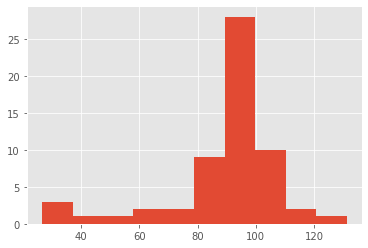

In [156]:
df_itog.groupby(['language'])['Length'].mean().hist()
# .apply(list)

In [165]:
from sklearn.tree import DecisionTreeClassifier

In [166]:
des_tree = DecisionTreeClassifier()

In [167]:
des_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [168]:
predictions = des_tree.predict(X_train)
balanced_accuracy_score(y_train, predictions)

0.06785396794635581

In [169]:
test_predictions = des_tree.predict(X_test)
balanced_accuracy_score(y_test, test_predictions)

0.06708556574887603

In [170]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
predictions = model.predict(X_train)
balanced_accuracy_score(y_train, predictions)


0.01694915254237288

In [139]:
test_predictions = model.predict(X_test)
balanced_accuracy_score(y_test, test_predictions)

0.817988558406982

Для длины лучше дерево(0.067 - тест) , для чара лучше байес(0.79 - тест), для ворда байес(0.81 - тест), 
для чара нграм(1, 2) - 0.76 байес



Стакаем результаты классификаторов по чару и ворду

In [10]:
y = df_train['language']

In [22]:
NB_word = MultinomialNB()
NB_word.fit(X_train_vectorized_word, y)
predictions = NB_word.predict(X_train_vectorized_word)
balanced_accuracy_score(y, predictions)

0.8759220791214367

In [27]:
# test_predictions = NB_word.predict(X_test)
# balanced_accuracy_score(y_test, test_predictions)

In [11]:
NB_char = MultinomialNB()
NB_char.fit(X_train_vectorized_char, y)
predictions = NB_char.predict(X_train_vectorized_char)
balanced_accuracy_score(y, predictions)

0.8318235923412443

In [29]:
# test_predictions = NB_char.predict(X_test)
# balanced_accuracy_score(y_test, test_predictions)

Объедини результаты классификаторов

In [23]:
predict_word = np.hstack((NB_word.predict_proba(X_train_vectorized_word),
                          NB_char.predict_proba(X_train_vectorized_char)))
# word_char = NB_word.predict_proba(X_train_vectorized_word) + NB_char.predict_proba(X_train_vectorized_char)

In [24]:
NB = MultinomialNB()
NB.fit(predict_word,y)

MultinomialNB()

In [40]:
test_predictions = NB.predict(predict_word)
balanced_accuracy_score(y, test_predictions)

0.8934670229918493

In [39]:
# from sklearn.model_selection import cross_val_score
# cross_val_score(NB, predict_word, y_test, cv=5, scoring='balanced_accuracy_score').mean()

Сохраняем классификатор, т.к. очень долго его обучать

In [61]:
from joblib import dump,load

In [44]:
dump(SGD, 'Class.joblibe')

['filename.joblibe']

In [45]:
clf = load('Class.joblibe')

Ответ

In [25]:
X_test_vectorized_word = vectorizer_word.transform(df_test['sentence'])
X_test_vectorized_char = vectorizer_char.transform(df_test['sentence'])

In [27]:
predict = np.hstack((NB_word.predict_proba(X_test_vectorized_word),
                        NB_char.predict_proba(X_test_vectorized_char)))
# word_char_ans = NB_word.predict_proba(X_test_vectorized_word) + NB_char.predict_proba(X_test_vectorized_char)

In [28]:
ans = NB.predict(predict)

In [29]:
ans

array(['he', 'pt-br', 'zh-tw', ..., 'sk', 'ko', 'zh-cn'], dtype='<U5')

In [30]:
# df_test['language'] = label_encoder.classes_[ans]
df_test['language'] = ans

In [31]:
df_test[['index','language']].to_csv("Prediction_NB_char_word_baz_stack.csv", index=False)

В итоговом ответе я использовал MultinomialNB, так как он выдавал самый лучший скор среди остальных, и время его обучения было минимально.

Предложение я делил на слова и на нграмы(1,2), обучал два классификатора отдельно на словах и на нграмах и далее объединял их ответы и строил третий классификатор только на ответах. Было два способа объединения: 

    1) Через np.hstack - так как получался вектор из 118 вероятностей, были сомнения, сможет ли классификатор понять, какие вероятности к какому классу относятся;
    2) Сложение вероятностей различных классификаторов
   В итоге оба способа давали одинаковый скор

Фильтрацию данных я производил с помощью KMeans. Для этого я брал отдельно каждый язык, кластеризовал его предложения на несколько кластеров и смотрел какие среди них выбросы.
